In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


def action_func(u):
    '''
    This return an equiprobable action if we're at state 1.
    The actions are -1,0,1 for left center and right
    '''
    if u==1:
        m=random.choice([-1,0,1])
        return m
    elif u==2 or u==3:
        m=random.choice([-1,1])
        return m
    else:
        ValueError(f' Invalid state with value {u}')
        
        
        
def reward_func(u,action_choice):
    '''
    u is the state takes values as 1,2,3
    m is the action which takes values of -1,0,1 for left, center, right if u ==1
    But if u is either 2,3 it'll take values of -1 or 1 for left and right
    '''

    if u==1:
        if action_choice==-1:
            return 1
        elif action_choice==0:
            return -1
        elif action_choice==1:
            return 2
    elif u==2:
        if action_choice==-1:
            return 8
        elif action_choice==1:
            return -8
    elif u==3:
        if action_choice==-1:
            return 0
        elif action_choice==1:
            return 4
    
    else:

        ValueError(f'Invalid action or state with values {action_choice} and {u}!')
            
            
            
def second_step_state_func():
    '''
    This function probabilistically returns either state 2 or 3 with 0.5 probability
    '''
    states=[2,3]
    u=random.choice(states)
    return u



def delta_error_func(w_u,w_u_prime,reward):
    
    return reward+w_u_prime-w_u


def update_weights(alpha,w,delta,state):
    
    w[state]=w[state]+alpha*delta
    return w



def policy_evaluation(n_trials,alpha):
    
    states=np.array([1,2,3])
    num_states= len(states)
    w=np.zeros((num_states+1,n_trials))
    #v=np.zeros((num_states+1,n_trials))
    state=1
    for trial in range(n_trials-1):
        
        
        #while state==1:
            
        action_choice=action_func(state)
        reward=reward_func(state,action_choice)
        
        if action_choice==-1 or action_choice==1:
            # This means the agent won't take a second step
            
            delta=delta_error_func(w[state,trial],0,reward) # here state+1 is zero because of the initialization :) but I'll hard code it for now that w_u_prime is always 0 
            
            w[:,trial]=update_weights(alpha,w[:,trial],delta,state)
            
            #v[:,trial]=w[:,trial]

            #the values of the leaves of the tree are set to 0 when traversal terminates,
            #w[state,trial+1]=0
            state=1

        
        elif action_choice==0:
            
            # First update just after receiving the shock but before choosing anything, so we're at some new state now
            u_prime=second_step_state_func()
            
            # This is the temporal difference for the next state
            delta=delta_error_func(w[state,trial],w[u_prime,trial],reward) # here state+1 is zero because of the initialization :) but I'll hard code it for now that w_u_prime is always 0 
            
            w[:,trial]=update_weights(alpha,w[:,trial],delta,state)
            
            
            # For the new action
            new_action=action_func(u_prime)
            
            reward=reward_func(u_prime,new_action)
            
            delta=delta_error_func(w[u_prime,trial],0,reward)
            
            w[:,trial]=update_weights(alpha,w[:,trial],delta,u_prime)
            
            #v[:,trial]=w[:,trial]

            state=u_prime
                
        w[:,trial+1]=w[:,trial]
        #v[:,trial+1]=v[:,trial]
                
                
    return w
            
def test_case():   
    n_trials=1000
    alpha=0.2
    w=policy_evaluation(n_trials,alpha)
    return w


def ensemble():
    num_states=3
    n_trials=1000
    alpha=0.2
    ensembe_size=10000
    w_ensemble=np.zeros((num_states+1,n_trials,ensembe_size))

    for i in range(ensembe_size):
        w_ensemble[:,:,i]=policy_evaluation(n_trials,alpha)    

    w_ensemble_mean=np.mean(w_ensemble,axis=2)
    
    return w_ensemble_mean



In [27]:
w=test_case()

In [3]:

w_ensemble_mean=ensemble()



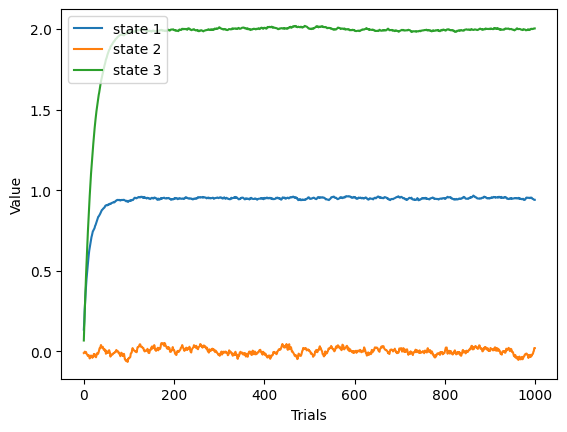

In [4]:
plt.plot(w_ensemble_mean[1,:],label='state 1')
plt.plot(w_ensemble_mean[2,:],label='state 2')
plt.plot(w_ensemble_mean[3,:],label='state 3')
plt.xlabel('Trials')
plt.ylabel('Value')
plt.legend()
plt.show()

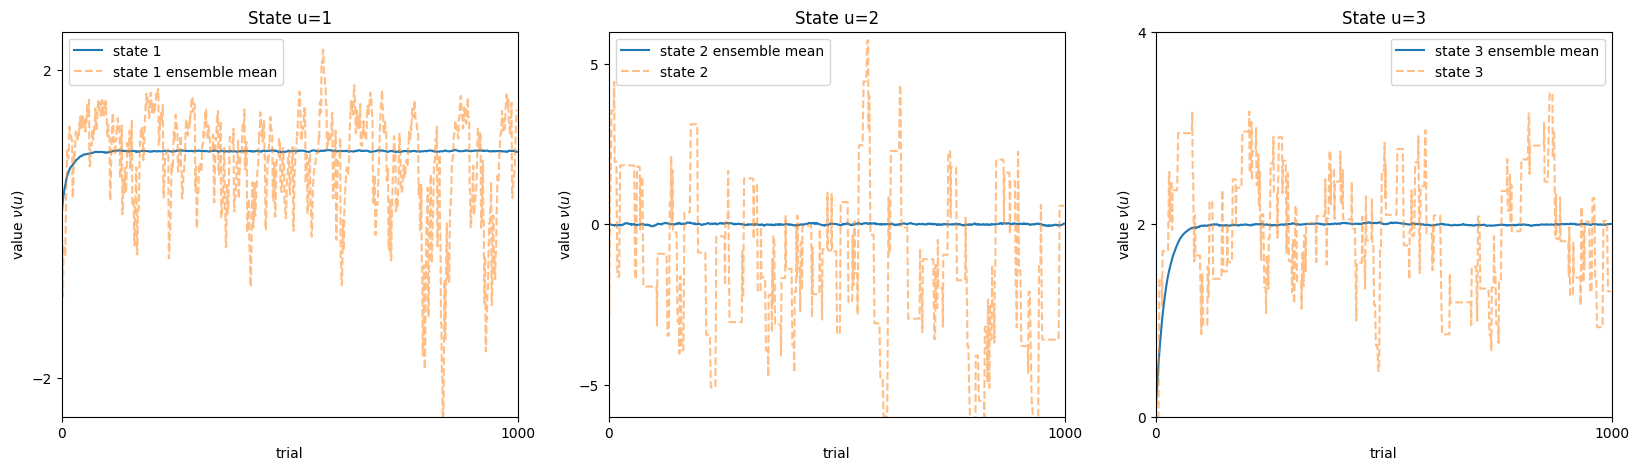

In [31]:
# plot subplots for each state, each subplot will have both the ensemble and the single run of the value function

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(w_ensemble_mean[1,:],label='state 1')
ax[0].plot(w[1,:],'--',label='state 1 ensemble mean',alpha=0.5)
ax[0].legend()
ax[0].set_xlabel('trial')
# set the axis to be \nu(u) latex
ax[0].set_ylabel(r'value $\nu(u)$')
# ax lim from -3 to 3 for y
ax[0].set_ylim(-2.5,2.5)
ax[0].set_xlim(0,1000)
# tick marks for x axis  0,  1000, and for y axis -2,2
ax[0].set_xticks([0,1000])
ax[0].set_yticks([-2,2])
# title for subplot state u=1
ax[0].set_title('State u=1')  


ax[1].plot(w_ensemble_mean[2,:],label='state 2 ensemble mean')
ax[1].plot(w[2,:],'--',label='state 2',alpha=0.5)
ax[1].legend()
ax[1].set_xlabel('trial')
ax[1].set_ylabel(r'value $\nu(u)$')
ax[1].set_ylim(-6,6)
ax[1].set_xlim(0,1000)
ax[1].set_xticks([0,1000])
ax[1].set_yticks([-5,0,5])
ax[1].set_title('State u=2')

ax[2].plot(w_ensemble_mean[3,:],label='state 3 ensemble mean')
ax[2].plot(w[3,:],'--',label='state 3',alpha=0.5)
ax[2].legend()
ax[2].set_xlabel('trial')
ax[2].set_ylabel(r'value $\nu(u)$')
ax[2].set_ylim(0,4)
ax[2].set_xlim(0,1000)
ax[2].set_xticks([0,1000])
ax[2].set_yticks([0,2,4])
ax[2].set_title('State u=3')

# save the figure   
plt.savefig('policy_evaluation.png',dpi=300)
